# Exploring results (MD maps) - Age square and FreeSurfer volumes

In [4]:
%run /home/grg/git/alfa/nilearn-helper.py
import sys
import pandas as pd
sys.path.append('/home/grg/git/alfa/')
import multireg_spm12 as mreg
reload(mreg)
%matplotlib inline

In [5]:
paramtype = 'MD'
analysis_name='dm_%s_agesq_fsvol'%paramtype
analysis_wd = osp.join('/home/grg/spm/analysis_20170116/', analysis_name)
spm = glob(osp.join(analysis_wd, 'estimatecontrasts/SPM.mat'))
aal_fp = '/usr/local/MATLAB/R2014a/toolbox/spm12/toolbox/aal/ROI_MNI_V5.nii'
mask_fp = '/home/grg/spm/MNI_T1_brain_mask.nii'
excel_fp = '/home/grg/spm/designmat/%s.xls'%analysis_name
print 'Found SPM files:', spm

Found SPM files: ['/home/grg/spm/analysis_20170116/dm_MD_agesq_fsvol/estimatecontrasts/SPM.mat']


In [6]:
print 'Reading', excel_fp, 'looking up column', paramtype, '...'
a = mreg.generic_version(excel_fp, analysis_wd, mask_fp, analysis_name)
n1 = a.get_node('modeldesign')
n3 = a.get_node('estimatecontrasts')
print '# of scans included in the analysis:', len(n1.inputs.in_files)
display_html(pd.DataFrame([e for e in n3.inputs.contrasts], 
             columns=['contrast name', 'contrast type', 'covariate names', 'covariate weights']))

Reading /home/grg/spm/designmat/dm_MD_agesq_fsvol.xls looking up column MD ...
Analysis name: dm_MD_agesq_fsvol
First column: MD
Columns in the model: [u'Apoe2-3', u'Apoe2-4', u'Apoe3-3', u'Apoe3-4', u'Apoe4-4', u'age', u'agesq', u'gender', u'ventricles_FS']
### Agesq identified
Analysis name: dm_MD_agesq_fsvol
Scans (514): [u'/home/grg/spm/MD/10070_MD_MNIspace_s.nii', u'/home/grg/spm/MD/10102_MD_MNIspace_s.nii', u'/home/grg/spm/MD/10108_MD_MNIspace_s.nii', u'/home/grg/spm/MD/10235_MD_MNIspace_s.nii', u'/home/grg/spm/MD/10365_MD_MNIspace_s.nii', u'/home/grg/spm/MD/10419_MD_MNIspace_s.nii', u'/home/grg/spm/MD/10463_MD_MNIspace_s.nii', u'/home/grg/spm/MD/10530_MD_MNIspace_s.nii', u'/home/grg/spm/MD/10551_MD_MNIspace_s.nii', u'/home/grg/spm/MD/10563_MD_MNIspace_s.nii', u'/home/grg/spm/MD/10576_MD_MNIspace_s.nii', u'/home/grg/spm/MD/10630_MD_MNIspace_s.nii', u'/home/grg/spm/MD/10668_MD_MNIspace_s.nii', u'/home/grg/spm/MD/10692_MD_MNIspace_s.nii', u'/home/grg/spm/MD/10693_MD_MNIspace_s.nii'

,contrast name,contrast type,covariate names,covariate weights
0,Age - Agesq,T,"[Apoe2-3, Apoe2-4, Apoe3-3, Apoe3-4, Apoe4-4, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, -1.0, 0.0, 0.0]"
1,Agesq - Age,T,"[Apoe2-3, Apoe2-4, Apoe3-3, Apoe3-4, Apoe4-4, ...","[0.0, 0.0, 0.0, 0.0, 0.0, -1.0, 1.0, 0.0, 0.0]"
2,Main effect Age,F,"[(Age - Agesq, T, [Apoe2-3, Apoe2-4, Apoe3-3, ...",None
3,Effect Age,T,"[Apoe2-3, Apoe2-4, Apoe3-3, Apoe3-4, Apoe4-4, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0]"
4,Effect Agesq,T,"[Apoe2-3, Apoe2-4, Apoe3-3, Apoe3-4, Apoe4-4, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0]"
5,Main effect Age (omnibus),F,"[(Effect Age, T, [Apoe2-3, Apoe2-4, Apoe3-3, A...",None


/home/grg/spm/analysis_20170116/dm_MD_agesq_fsvol/estimatecontrasts/spmT_0001.nii T
/home/grg/spm/analysis_20170116/dm_MD_agesq_fsvol/estimatecontrasts/spmT_0002.nii T
/home/grg/spm/analysis_20170116/dm_MD_agesq_fsvol/estimatecontrasts/spmF_0003.nii F


/home/grg/jupyter/local/lib/python2.7/site-packages/nilearn/plotting/displays.py:656: UserWarning: empty mask
  get_mask_bounds(new_img_like(img, not_mask, affine))


/home/grg/spm/analysis_20170116/dm_MD_agesq_fsvol/estimatecontrasts/spmT_0004.nii T
/home/grg/spm/analysis_20170116/dm_MD_agesq_fsvol/estimatecontrasts/spmT_0005.nii T
/home/grg/spm/analysis_20170116/dm_MD_agesq_fsvol/estimatecontrasts/spmF_0006.nii F


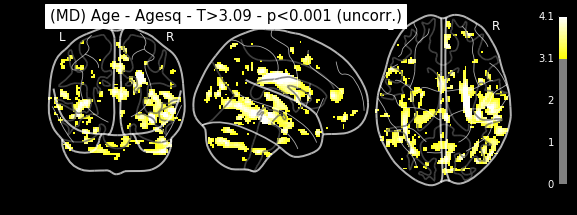

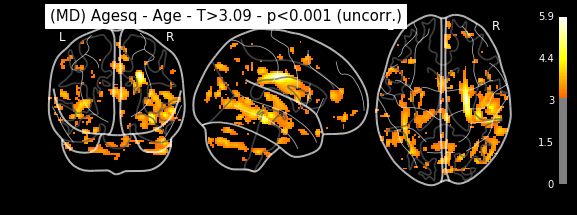

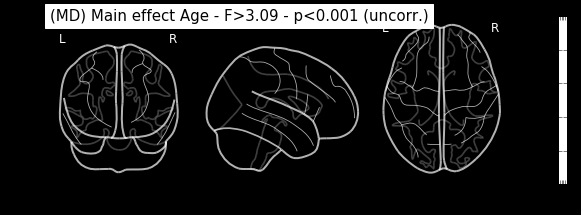

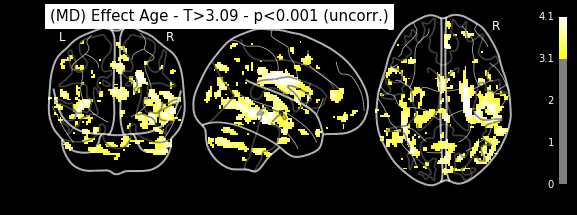

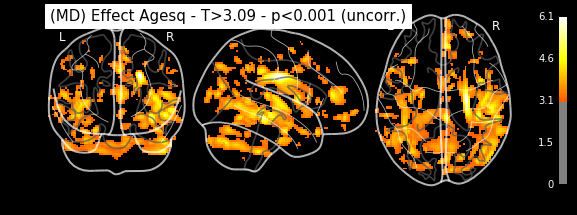

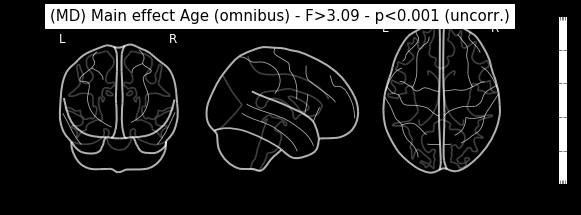

In [7]:
spm_mat_file = glob(osp.join(analysis_wd, 'estimatecontrasts/SPM.mat'))[0]
for i in range(1, len(n3.inputs.contrasts)+1):
    img = glob(osp.join(analysis_wd, 'estimatecontrasts/spm*_00%02d.nii'%i))[0]
    contrast_type = osp.split(img)[-1][3]
    print img, contrast_type
    contrast_name = n3.inputs.contrasts[i-1][0]
    thresholded_map1, threshold1 = map_threshold(img, threshold=0.001, cluster_threshold=10)
    plotting.plot_glass_brain(img,
                      title='(%s) %s - %s>%.02f - p<0.001 (uncorr.)'%(paramtype, contrast_name, contrast_type, threshold1), colorbar=True,
                      black_bg=True, display_mode='ortho', threshold=threshold1)  
plotting.show()

/home/grg/spm/analysis_20170116/dm_MD_agesq_fsvol/estimatecontrasts/spmT_0001.nii T
Saving to... /tmp/tmpPhKeGN.png
/home/grg/spm/analysis_20170116/dm_MD_agesq_fsvol/estimatecontrasts/spmT_0002.nii T
Saving to... /tmp/tmpAbELjP.png
/home/grg/spm/analysis_20170116/dm_MD_agesq_fsvol/estimatecontrasts/spmF_0003.nii F
Saving to... /tmp/tmpeAttTQ.png
/home/grg/spm/analysis_20170116/dm_MD_agesq_fsvol/estimatecontrasts/spmT_0004.nii T
Saving to... /tmp/tmp4HUidp.png
/home/grg/spm/analysis_20170116/dm_MD_agesq_fsvol/estimatecontrasts/spmT_0005.nii T
Saving to... /tmp/tmp7UPBR9.png
/home/grg/spm/analysis_20170116/dm_MD_agesq_fsvol/estimatecontrasts/spmF_0006.nii F
Saving to... /tmp/tmp84zmvA.png


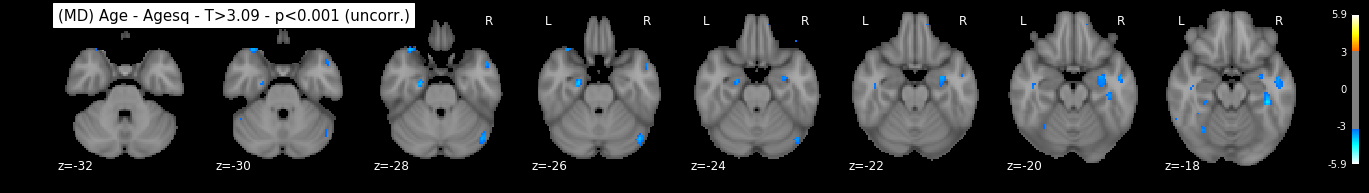

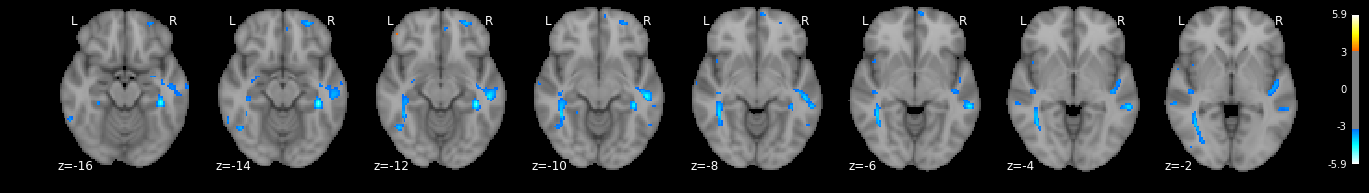

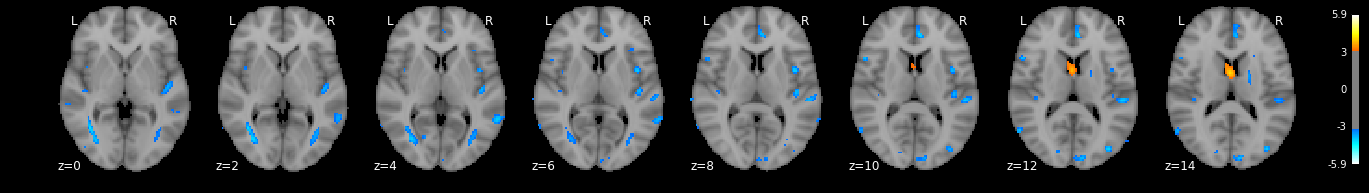

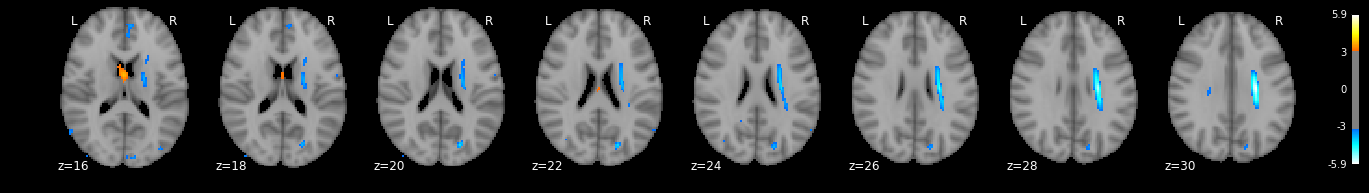

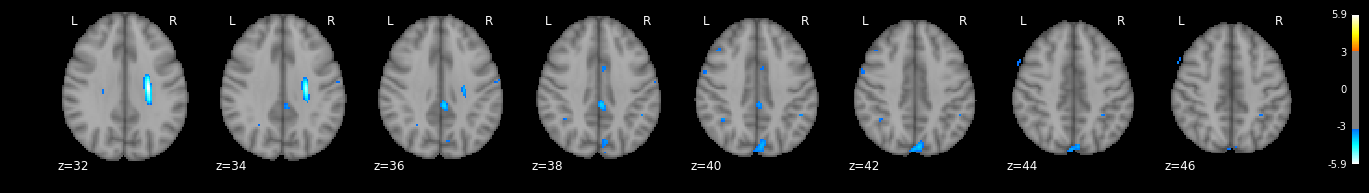

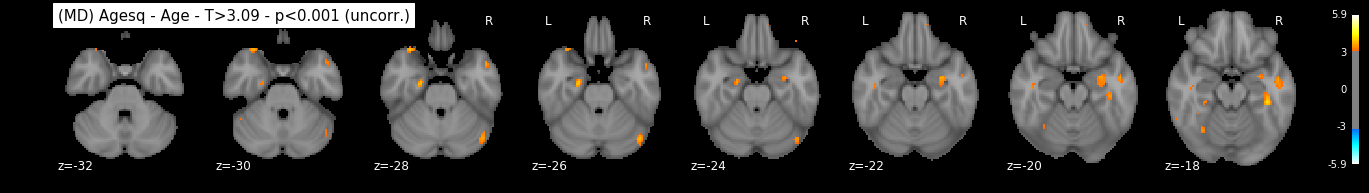

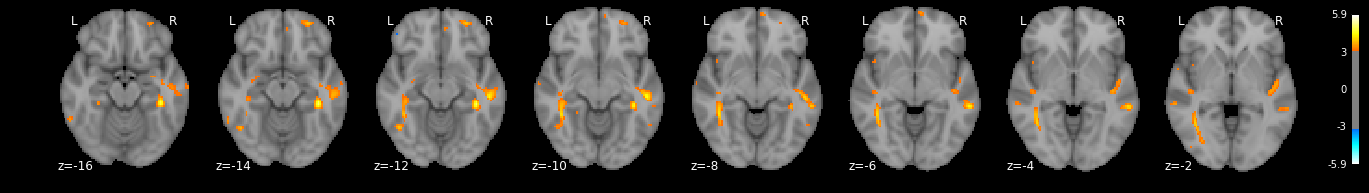

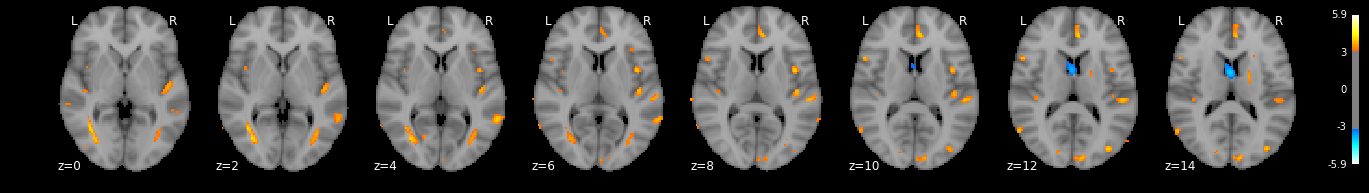

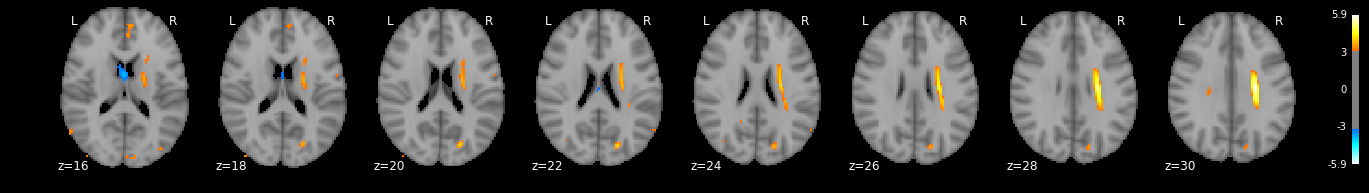

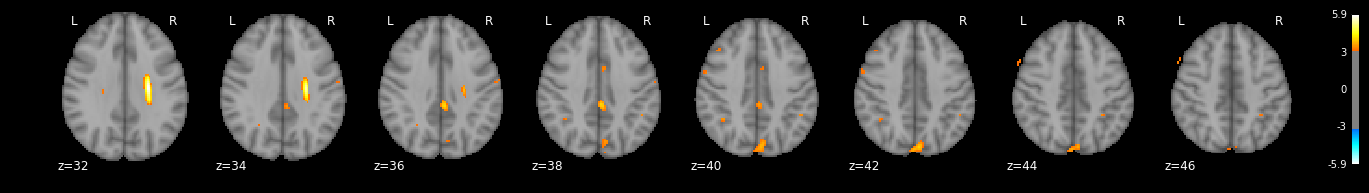

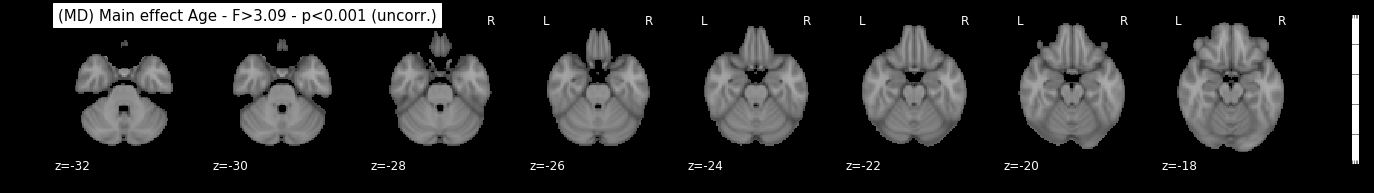

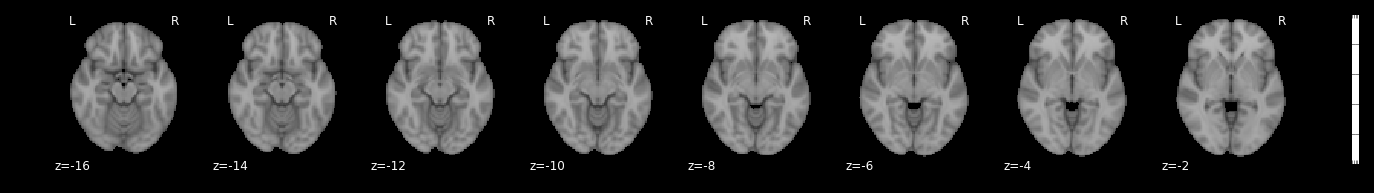

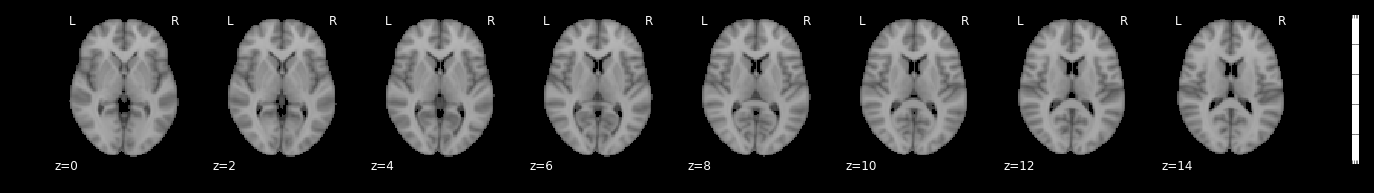

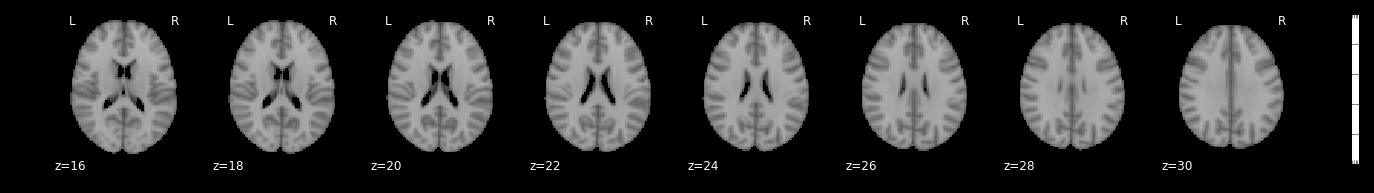

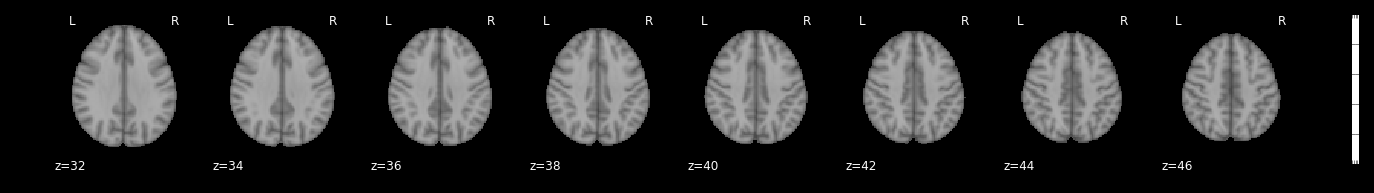

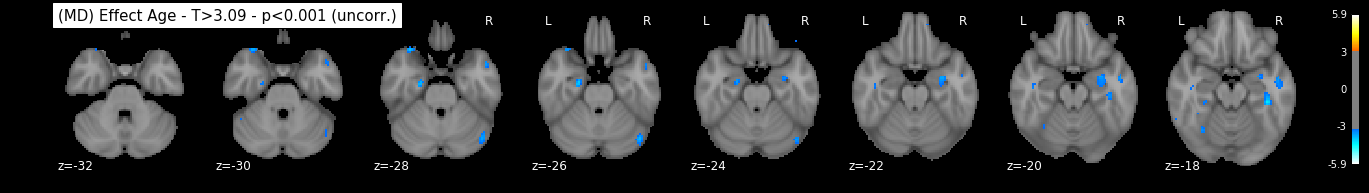

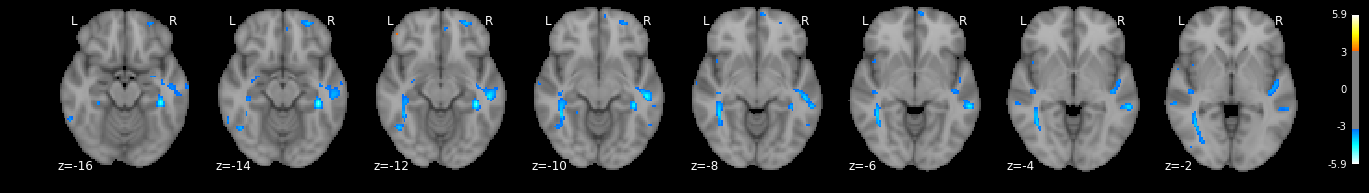

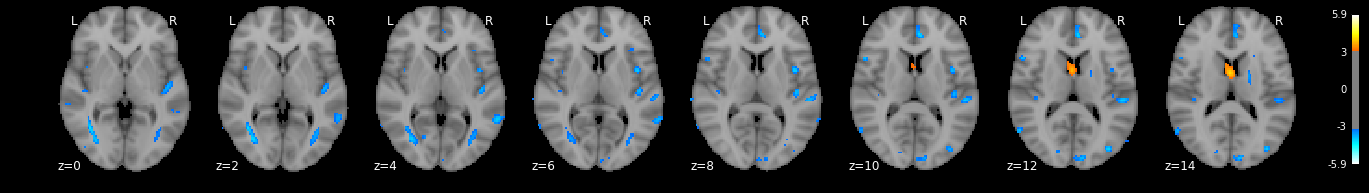

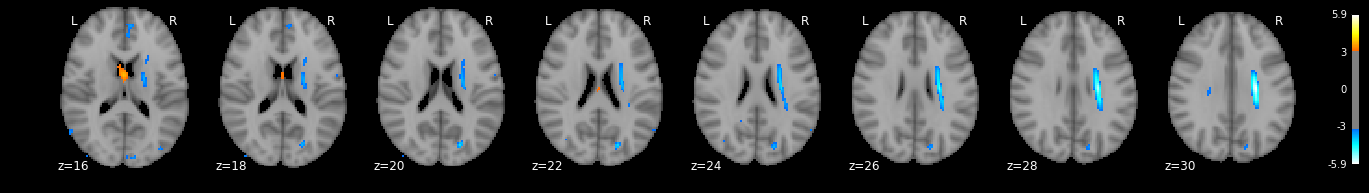

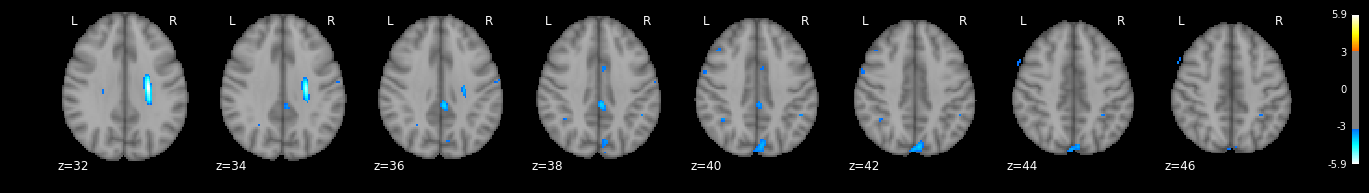

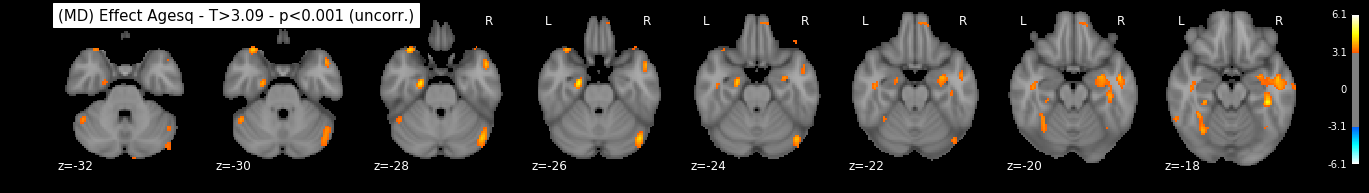

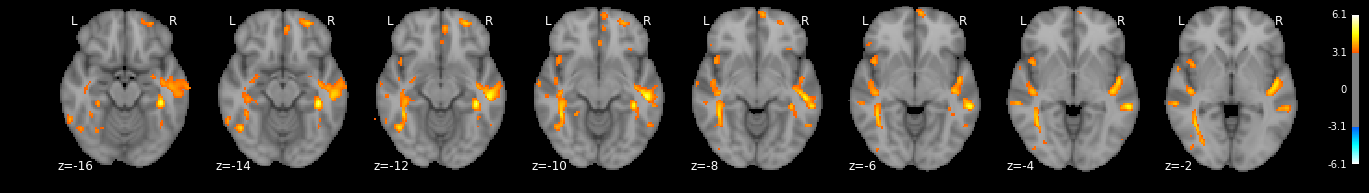

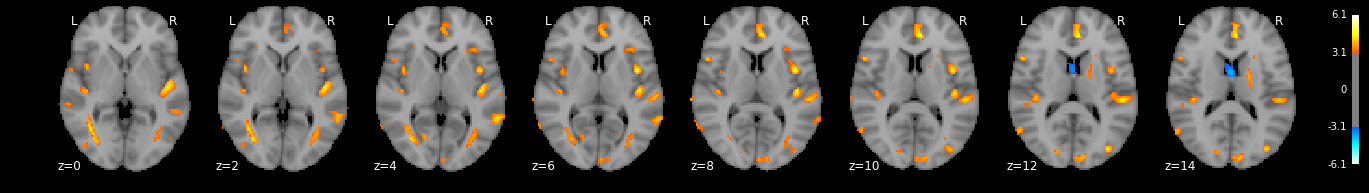

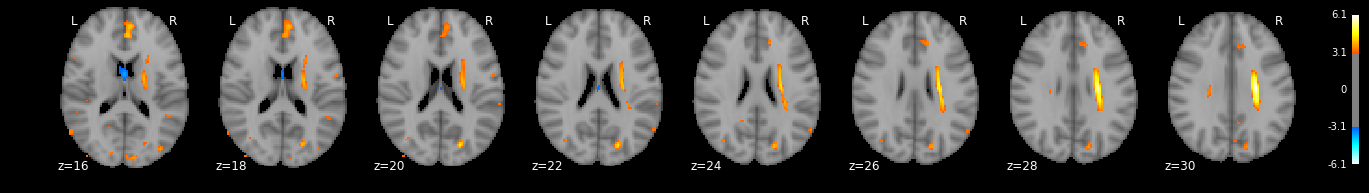

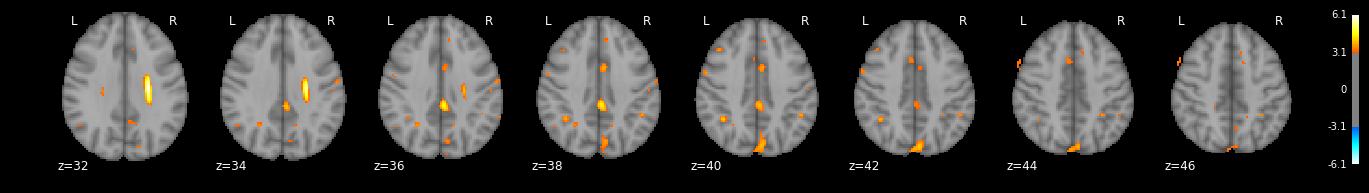

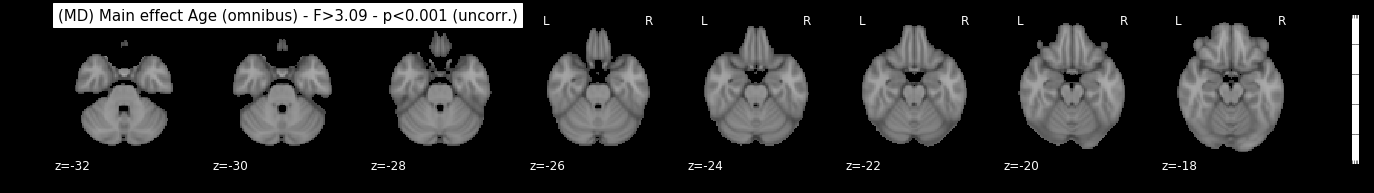

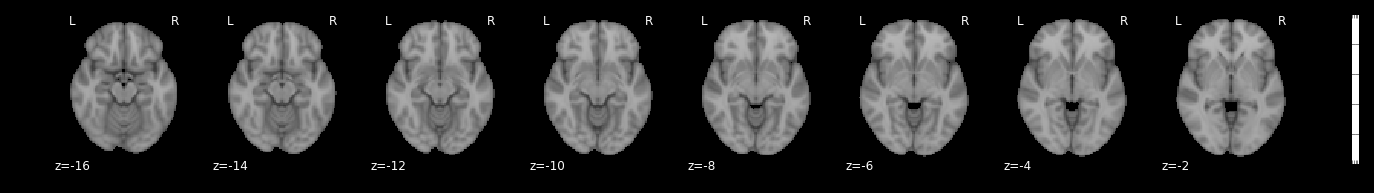

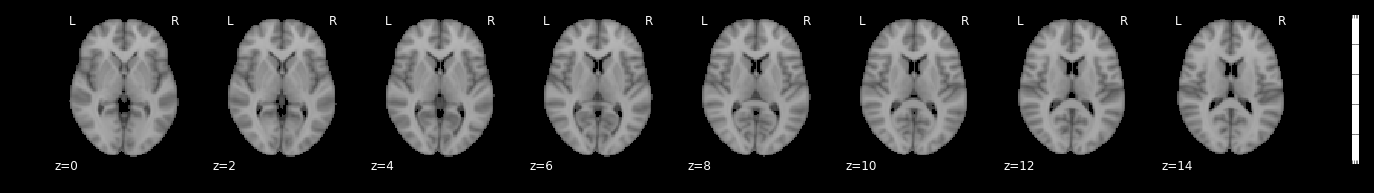

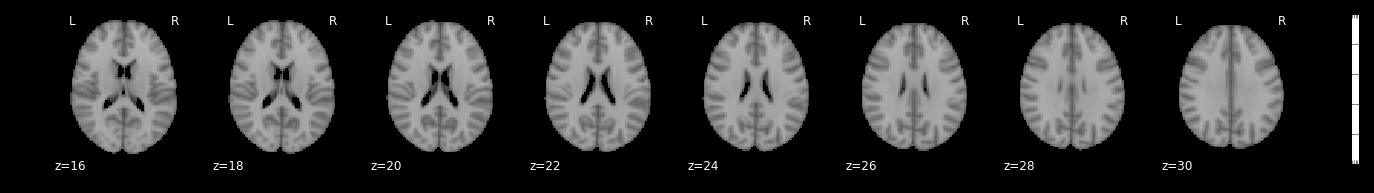

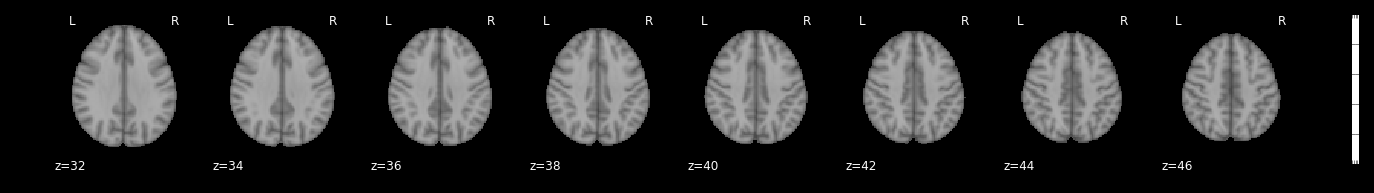

In [8]:
for i in range(1, len(n3.inputs.contrasts)+1):
    img = glob(osp.join(analysis_wd, 'estimatecontrasts/spm*_00%02d.nii'%i))[0]
    contrast_type = osp.split(img)[-1][3]
    print img, contrast_type
    contrast_name = n3.inputs.contrasts[i-1][0]
    thresholded_map1, threshold1 = map_threshold(img, threshold=0.001, cluster_threshold=10)

    plot_stat_map(img, threshold=threshold1, row_l=8, start=-32, end=34, step=2,
                  title= '(%s) %s - %s>%.02f - p<0.001 (uncorr.)'%(paramtype, contrast_name, contrast_type, threshold1))
        
plotting.show()